In [1]:
from __future__ import division, print_function
from six import print_ as print
import idi.simulation as sim
import numpy as np
from numpy import pi
!hostname

psanagpu106


In [2]:
import os
os.environ['PATH']+=':/usr/local/cuda/bin/' # cuda must be in path

**Settings**

In [3]:
outfile = 'out.npz'
Natoms = int(1e6)
Ndet = 1024
detz = 4.1  # in cm
pixelsize = 75 # in um
Nimg = 200
E = 8040  # in ev
rndphase = True
rotangles = np.array([10,10,10]) / 180 * pi
simtype = 'gridfcc'
cuda = True
a = 3.6  # in A # not used for cuso4

**Simulation**

In [4]:
print("preparing")
_a = a * 1e-4 # in um
_detz = detz * 1e4 # in um
k = 2 * pi / (1.24 / E)  # in 1/um
N = Natoms
if simtype == 'gridsc':
    simobject = sim.simobj.gridsc(N, _a, E, rotangles)
elif simtype == 'gridfcc':
    simobject = sim.simobj.gridfcc(N, _a, E, rotangles)
elif simtype == 'gridcuso4':
    simobject = sim.simobj.gridcuso4(N, E, rotangles)
else:
    raise NotImplementedError("unknown object to simulate")
simobject.rndPhase = rndphase


preparing


In [5]:
print("simulating")
if cuda:
    result = sim.cuda.simulate(Nimg, simobject, Ndet, pixelsize, _detz, k)
else:
    print("using cpu")
    result = sim.cpu.simulate(Nimg, simobject, Ndet, pixelsize, _detz, k)
result = np.abs(result * result.conjugate())

simulating
0.. 1.. 2.. 3.. 4.. 5.. 6.. 7.. 8.. 9.. 10.. 11.. 12.. 13.. 14.. 15.. 16.. 17.. 18.. 19.. 20.. 21.. 22.. 23.. 24.. 25.. 26.. 27.. 28.. 29.. 30.. 31.. 32.. 33.. 34.. 35.. 36.. 37.. 38.. 39.. 40.. 41.. 42.. 43.. 44.. 45.. 46.. 47.. 48.. 49.. 50.. 51.. 52.. 53.. 54.. 55.. 56.. 57.. 58.. 59.. 60.. 61.. 62.. 63.. 64.. 65.. 66.. 67.. 68.. 69.. 70.. 71.. 72.. 73.. 74.. 75.. 76.. 77.. 78.. 79.. 80.. 81.. 82.. 83.. 84.. 85.. 86.. 87.. 88.. 89.. 90.. 91.. 92.. 93.. 94.. 95.. 96.. 97.. 98.. 99.. 100.. 101.. 102.. 103.. 104.. 105.. 106.. 107.. 108.. 109.. 110.. 111.. 112.. 113.. 114.. 115.. 116.. 117.. 118.. 119.. 120.. 121.. 122.. 123.. 124.. 125.. 126.. 127.. 128.. 129.. 130.. 131.. 132.. 133.. 134.. 135.. 136.. 137.. 138.. 139.. 140.. 141.. 142.. 143.. 144.. 145.. 146.. 147.. 148.. 149.. 150.. 151.. 152.. 153.. 154.. 155.. 156.. 157.. 158.. 159.. 160.. 161.. 162.. 163.. 164.. 165.. 166.. 167.. 168.. 169.. 170.. 171.. 172.. 173.. 174.. 175.. 176.. 177.. 178.. 179.. 180.. 181.. 182.. 1

In [6]:
print("saving")
np.savez_compressed(outfile, result = result, settings = ({
    'Natoms': Natoms,
    'Ndet': Ndet,
    'detz': detz,
    'Nimg': Nimg,
    'a': a,
    'pixelsize': pixelsize,
    'E': E,
    'rndphase': rndphase,
    'rotangles': rotangles,
    }, [simtype]))

saving


In [7]:
print("done")

done


**Show Simulation object**

In [8]:
pos=simobject.get()

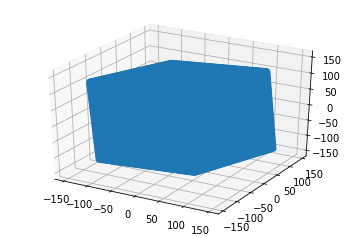

In [9]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(pos[:,0]*1e4,pos[:,1]*1e4,pos[:,2]*1e4)
